In [1]:
import pandas as pd

parquet_path = "output/wikipedia_vietnam_full.parquet"
df_parquet = pd.read_parquet(parquet_path)
print(df_parquet.info())
print(df_parquet.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37914 entries, 0 to 37913
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       37914 non-null  object
 1   url         37914 non-null  object
 2   text        37914 non-null  object
 3   summary     37914 non-null  object
 4   categories  37914 non-null  object
 5   crawled_at  37914 non-null  object
 6   length      37914 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 2.0+ MB
None
                                   title  \
0              Anh hùng dân tộc Việt Nam   
1                         An Dương Vương   
2                      Nhà nước Việt Nam   
3                             Chúa Trịnh   
4  Cải cách điền địa (Việt Nam Cộng hòa)   

                                                 url  \
0  https://vi.wikipedia.org/wiki/Anh_h%C3%B9ng_d%...   
1  https://vi.wikipedia.org/wiki/An_D%C6%B0%C6%A1...   
2  https://vi.wikipedia.org/wiki/Nh%C3%A0_n%

In [2]:
df_parquet[:5]

,title,url,text,summary,categories,crawled_at,length
0,Anh hùng dân tộc Việt Nam,https://vi.wikipedia.org/wiki/Anh_h%C3%B9ng_d%...,Anh hùng dân tộc Việt Nam là thuật ngữ chỉ nhữ...,Anh hùng dân tộc Việt Nam là thuật ngữ chỉ nhữ...,[Nhân_vật_lịch_sử_Việt_Nam],2025-11-25T08:51:20.608476,3985
1,An Dương Vương,https://vi.wikipedia.org/wiki/An_D%C6%B0%C6%A1...,"An Dương Vương (chữ Hán: 安陽王), tên thật là Thụ...","An Dương Vương (chữ Hán: 安陽王), tên thật là Thụ...",[Triều_đại_Việt_Nam],2025-11-25T08:51:20.691663,11805
2,Nhà nước Việt Nam,https://vi.wikipedia.org/wiki/Nh%C3%A0_n%C6%B0...,Nhà nước Cộng hòa xã hội chủ nghĩa Việt Nam là...,Nhà nước Cộng hòa xã hội chủ nghĩa Việt Nam là...,[Nhà_nước_Việt_Nam],2025-11-25T08:51:20.778537,12275
3,Chúa Trịnh,https://vi.wikipedia.org/wiki/Ch%C3%BAa_Tr%E1%...,"Chúa Trịnh (chữ Nôm: 主鄭, chữ Hán: 鄭王 / Trịnh v...","Chúa Trịnh (chữ Nôm: 主鄭, chữ Hán: 鄭王 / Trịnh v...",[Chúa_Trịnh],2025-11-25T08:51:20.930408,21909
4,Cải cách điền địa (Việt Nam Cộng hòa),https://vi.wikipedia.org/wiki/C%E1%BA%A3i_c%C3...,Cải cách điền địa là tên gọi chung cho 2 đợt p...,Cải cách điền địa là tên gọi chung cho 2 đợt p...,[Sự_kiện_lịch_sử_Việt_Nam],2025-11-25T08:51:21.073649,26658


In [3]:
df_parquet['text'].iloc[0]

'Anh hùng dân tộc Việt Nam là thuật ngữ chỉ những người có công kiệt xuất trong cuộc đấu tranh cho sự trường tồn và phát triển của dân tộc Việt Nam, được nhân dân suy tôn làm anh hùng và ghi danh vào lịch sử dân tộc Việt Nam.\n\nĐặc điểm\nAnh hào dân tộc thường xuất hiện ở bước ngoặt lịch sử của dân tộc, trở thành biểu tượng và niềm tự hào bất diệt của dân tộc. Như vậy, Anh hùng dân tộc là danh hiệu cao quý hơn Anh hùng (là người tài năng xuất chúng, công to, đức cả khiến mọi người đều kính phục) và các danh hiệu Anh hùng Lực lượng vũ trang nhân dân và Anh hùng lao động ở Việt Nam.\nTrong suốt lịch sử hàng nghìn năm bảo vệ và phát triển đất nước của dân tộc Việt Nam đã xuất hiện nhiều anh hùng tiêu biểu. Năm 2013, lần đầu tiên, Bộ Văn hóa, Thể thao và Du lịch đã đưa ra danh sách 14 vị anh hùng tiêu biểu nhất trong lịch sử Việt Nam để tôn vinh Anh hùng dân tộc theo thứ tự thời gian như sau:\n\nHùng Vương: Quốc tổ của người dân Việt Nam khởi sinh ra thời Hồng Bàng với 18 đời vua trị vì.\

In [4]:
df_parquet.shape

(37914, 7)

In [36]:
"""
Vietnamese Wikipedia Chunking Processor (Final Optimized Version)
===============================================================
Features:
1. Aggressive Cleaning: Cắt bỏ hoàn toàn phần Footer (Tham khảo, Xem thêm...) để tránh nhiễu.
2. Line Merging: Gộp các tiêu đề cô lập (orphan headers) vào nội dung chính.
3. Quality Filtering: Loại bỏ các chunk vô nghĩa, thiếu cấu trúc câu.
4. Context Injection: Gắn tiêu đề bài viết vào từng chunk.
"""

import pandas as pd
from langchain_text_splitters import RecursiveCharacterTextSplitter
from tqdm import tqdm
import re
import os
from pathlib import Path

# ===========================
# 1. CẤU HÌNH HỆ THỐNG
# ===========================
class Config:
    # Đường dẫn file Input (Kết quả từ bước Crawl)
    # Lưu ý: Sửa tên file này cho khớp với file bạn đang có trong thư mục output
    INPUT_FILE = Path("output\wikipedia_vietnam_full.parquet") 
    
    # Đường dẫn file Output (Kết quả sau khi Chunking)
    OUTPUT_FILE = Path("output/wiki_vn_chunks_optimized.parquet")
    
    # Cấu hình Chunking
    CHUNK_SIZE = 800   # Ký tự (~300-400 từ, an toàn cho model 512 token)
    CHUNK_OVERLAP = 150 # Giữ ngữ cảnh nối tiếp giữa các đoạn

# ===========================
# 2. HÀM LÀM SẠCH TEXT (CORE LOGIC)
# ===========================
def clean_wiki_text(text: str) -> str:
    """
    Làm sạch văn bản Wikipedia (Fix triệt để lỗi chunk cuối bị dính footer)
    """
    if not isinstance(text, str) or not text: return ""
    
    # --- 1. CẮT BỎ FOOTER (Logic dòng đơn) ---
    # Thay vì tìm regex phức tạp, ta duyệt từng dòng.
    # Nếu gặp dòng nào ngắn (< 50 ký tự) mà chứa từ khóa dừng -> CẮT HẾT từ đó về sau.
    
    stop_phrases = [
        'tham khảo', 'thao khảo', 'liên kết ngoài', 'chú thích', 'xem thêm',
        'tài liệu tham khảo', 'đọc thêm', 'nguồn', 'ghi chú'
    ]
    
    lines = text.split('\n')
    cut_index = len(lines) # Mặc định lấy hết
    
    for i, line in enumerate(lines):
        # Chuẩn hóa dòng để kiểm tra
        line_clean = line.strip().lower()
        
        # Bỏ các ký tự trang trí như =, -, :
        line_clean = re.sub(r'[=:\-\.]', '', line_clean).strip()
        
        # Nếu dòng ngắn (là tiêu đề) và khớp từ khóa dừng
        if len(line_clean) < 40 and line_clean in stop_phrases:
            cut_index = i
            break
            
    # Cắt bỏ phần rác
    text = '\n'.join(lines[:cut_index])

    # --- 2. XÓA RÁC ARTIFACTS ---
    text = re.sub(r'\[\d+\]', '', text) # [1]
    text = re.sub(r'\[[a-zà-ỹ\s]+\]', '', text, flags=re.IGNORECASE) # [cần dẫn nguồn]
    text = re.sub(r'\[\[.*?\]\]', '', text) # [[File:...]]
    
    # --- 3. GỘP DÒNG TIÊU ĐỀ (Fix lỗi cụt lủn) ---
    # Biến các dòng tiêu đề cô lập thành câu để dính vào đoạn sau
    text = text.replace('\r\n', '\n')
    # Regex: Tìm dấu xuống dòng đơn (\n) không đi kèm \n khác
    text = re.sub(r'(?<!\n)\n(?!\n)', '. ', text)
    
    # --- 4. DỌN DẸP LẦN CUỐI ---
    text = re.sub(r'\.\.', '.', text) # Sửa lỗi 2 dấu chấm
    text = re.sub(r'\. \.', '.', text)
    text = re.sub(r' +', ' ', text) # Xóa khoảng trắng thừa
    
    return text.strip()

# ===========================
# 3. HÀM CHUNKING PROCESS
# ===========================
def process_chunking():
    # --- A. LOAD DỮ LIỆU ---
    print(f"🚀 Đang đọc dữ liệu từ: {Config.INPUT_FILE}")
    if not Config.INPUT_FILE.exists():
        print(f"❌ Lỗi: Không tìm thấy file {Config.INPUT_FILE}")
        return

    try:
        if Config.INPUT_FILE.suffix == '.parquet':
            df = pd.read_parquet(Config.INPUT_FILE)
        else:
            df = pd.read_csv(Config.INPUT_FILE)
    except Exception as e:
        print(f"❌ Lỗi đọc file: {e}")
        return
        
    print(f"📦 Số lượng bài viết gốc: {len(df)}")
    
    # --- B. KHỞI TẠO SPLITTER ---
    # Ưu tiên cắt theo đoạn văn (\n\n) trước, sau đó đến câu (. )
    splitter = RecursiveCharacterTextSplitter(
        chunk_size=800,
        chunk_overlap=150,
        separators=[
        "\n\n",      # Ưu tiên 1: Ngắt đoạn
        "\n",        # Ưu tiên 2: Xuống dòng
        ". ",        # Ưu tiên 3: Hết câu (có dấu cách)
        ".",         # Ưu tiên 4: Hết câu (dính liền - trường hợp lỗi typo)
        "!", "?",    # Câu cảm thán/hỏi
        ";",         # Dấu chấm phẩy
        " ",         # Dấu cách (Fallback cuối cùng)
        ""           # Cắt ký tự (Bất đắc dĩ mới dùng)
    ],
        length_function=len,
        is_separator_regex=False
    )
    
    final_chunks = []
    print("✂️ Bắt đầu xử lý (Cleaning -> Chunking -> Context Injection)...")
    
    # --- C. VÒNG LẶP XỬ LÝ ---
    for idx, row in tqdm(df.iterrows(), total=len(df)):
        original_text = row.get('text', '')
        title = row.get('title', 'Không tiêu đề')
        url = row.get('url', '')
        categories = row.get('categories', [])
        
        # Convert categories list to string
        cat_str = str(categories) if categories else ""

        # 1. CLEANING
        clean_text = clean_wiki_text(original_text)
        
        # Lọc thô: Bài quá ngắn sau khi clean -> Bỏ
        if len(clean_text) < 50: continue

        # 2. CHUNKING
        chunks = splitter.create_documents([clean_text])
        
        for i, chunk in enumerate(chunks):
            content = re.sub(r'^[.,;\s]+', '', chunk.page_content).strip()
            
            # --- D. BỘ LỌC CHẤT LƯỢNG (QUALITY FILTER) ---
            
            # Lọc 1: Chunk quá ngắn
            if len(content) < 60: continue

            # 2. Lọc chunk "Treo" (Vấn đề 1)
            # Nếu kết thúc bằng dấu hai chấm, nghĩa là nó chưa nói hết câu -> BỎ
            if content.endswith(':'): continue

            # 3. Lọc chunk "Danh sách rác" (Vấn đề 3)
            # Nếu chunk chứa từ "Niên biểu", "Xem thêm", "Mục lục" và ngắn dưới 100 ký tự -> BỎ
            bad_keywords = ["Niên biểu", "Mục lục", "Danh sách", "Các vua", "Tiểu sử"]
            if len(content) < 100 and any(kw in content for kw in bad_keywords):
                if content.count('.') > 2: # Nếu có nhiều dấu chấm (do gộp dòng tiêu đề)
                    continue

            # 4. Lọc chunk không có dấu kết thúc câu (Bị cắt cụt xấu)
            # Chỉ áp dụng nếu chunk ngắn (< 150 ký tự)
            if len(content) < 150 and content[-1] not in ['.', '!', '?', '"', "'", ')']:
                continue
            
            # Lọc 2: Chunk không có dấu câu kết thúc (thường là list rác)
            if not any(char in content for char in ['.', '?', '!', ';']):
                # Cho phép ngoại lệ nếu chunk rất dài (có thể là đoạn văn thiếu dấu chấm)
                if len(content) < 100: continue
            
            # Lọc 3: Chunk chứa quá nhiều từ khóa sách vở (List tài liệu tham khảo sót lại)
            if content.count("ISBN") > 0 or content.count("Xuất bản") > 1:
                continue

            # --- E. CONTEXT INJECTION (Tiêm ngữ cảnh) ---
            # Format: "Chủ đề: {title}\nNội dung: {content}"
            if content[-1] not in ['.', '!', '?', ';', '"', "'", ')']:
                content += "."
                
            vector_text = f"Chủ đề: {title}\nNội dung: {content}"
            
            final_chunks.append({
                "chunk_id": f"{idx}_{i}",
                "doc_title": title,
                "doc_url": url,
                "doc_category": cat_str,
                "vector_text": vector_text,    # Text dùng để Embed (Có ngữ cảnh)
                "display_text": content,       # Text gốc (Dùng để hiển thị)
                "char_len": len(vector_text)
            })

    # --- F. LƯU KẾT QUẢ ---
    if not final_chunks:
        print("⚠️ Cảnh báo: Không tạo ra được chunk nào!")
        return

    result_df = pd.DataFrame(final_chunks)
    
    print(f"\n✅ Xử lý hoàn tất!")
    print(f"   - Đầu vào: {len(df)} bài viết")
    print(f"   - Đầu ra : {len(result_df)} chunks sạch")
    print(f"   - Tỷ lệ  : {len(result_df)/len(df):.1f} chunks/bài")
    
    # Tạo thư mục output nếu chưa có
    os.makedirs(Config.OUTPUT_FILE.parent, exist_ok=True)
    
    result_df.to_parquet(Config.OUTPUT_FILE, index=False, compression='snappy')
    print(f"💾 File đã lưu tại: {Config.OUTPUT_FILE}")
    
    # --- G. KIỂM TRA MẪU (SANITY CHECK) ---
    print("\n" + "="*60)
    print("🔍 KIỂM TRA 1 CHUNK NGẪU NHIÊN")
    print("="*60)
    if len(result_df) > 0:
        sample = result_df.sample(1).iloc[0]
        print(f"[Title]: {sample['doc_title']}")
        print(f"[Vector Text]:\n{sample['vector_text']}")
        print("-"*60)

if __name__ == "__main__":
    process_chunking()

🚀 Đang đọc dữ liệu từ: output\wikipedia_vietnam_full.parquet
📦 Số lượng bài viết gốc: 37914
✂️ Bắt đầu xử lý (Cleaning -> Chunking -> Context Injection)...


100%|██████████| 37914/37914 [00:42<00:00, 902.50it/s] 



✅ Xử lý hoàn tất!
   - Đầu vào: 37914 bài viết
   - Đầu ra : 230326 chunks sạch
   - Tỷ lệ  : 6.1 chunks/bài
💾 File đã lưu tại: output\wiki_vn_chunks_optimized.parquet

🔍 KIỂM TRA 1 CHUNK NGẪU NHIÊN
[Title]: Lê Bá Hùng
[Vector Text]:
Chủ đề: Lê Bá Hùng
Nội dung: Tàu trị giá 800 triệu USD, với thủy thủ đoàn 300 người. Ngày 7 tháng 11 năm 2009, ông chỉ huy chiến hạm USS Lassen cập cảng Đà Nẵng trong một sứ mạng công tác xã hội. Chuyến viếng thăm hữu nghị này được truyền thông Việt Nam đánh giá là để phát triển quan hệ quân sự Mỹ Việt. Đây cũng là lần đầu tiên ông trở lại quê hương sau 35 năm và được các đồng cấp Việt Nam đón tiếp trọng thể. Trong chuyến thăm, trung tá Lê Bá Hùng đã phát biểu: "Tình hữu nghị giữa Việt Nam và Mỹ đang phát triển và sự cam kết hợp tác quân sự của Mỹ đối với Việt Nam tiếp tục tiến đến một tầm cao hơn". Ngày 17 tháng 12 năm 2010, ông thôi làm Hạm trưởng USS Lassen, được điều động sang làm Phụ tá điều hành cho Phó đô đốc Scott R. Van Buskirk, Tư lệnh Hạm Đội 7

In [42]:
path1 = "output/final_wikipedia_vietnam_chunks.parquet"
df1 = pd.read_parquet(path=path1)

In [43]:
df1.shape

(231251, 7)

=== THỐNG KÊ ĐỘ DÀI CHUNK ===
count    231251.000000
mean        611.241205
std         197.946042
min          85.000000
25%         471.000000
50%         682.000000
75%         774.000000
max         917.000000
Name: vector_text, dtype: float64


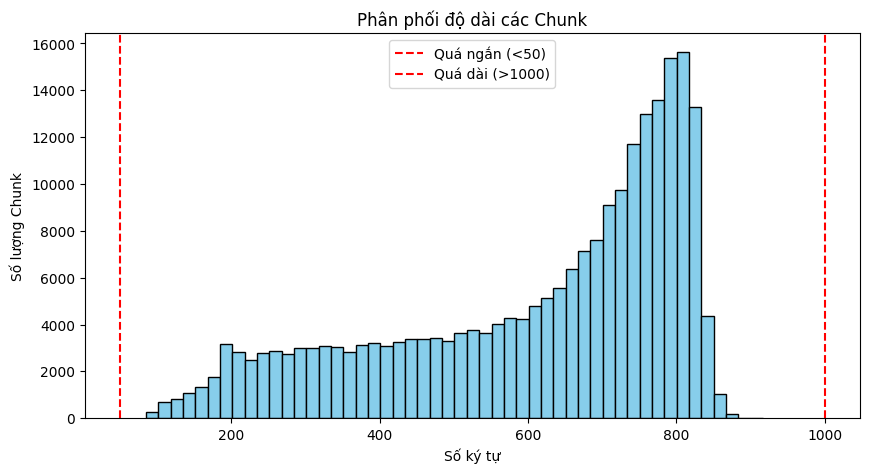


--- Top 5 Chunk ngắn nhất (Cần kiểm tra xem có phải rác không) ---
['Chủ đề: Lê Bôi\nNội dung: Cái chết. Hiện chưa rõ nguyên nhân ông mất và mất vào năm nào.'
 'Chủ đề: Lý Quốc Sư\nNội dung: Ở vùng châu thổ sông Hồng, tỉnh thành nào cũng có nhiều nơi thờ ông.'
 'Chủ đề: Tô Lâm\nNội dung: Ông cũng đã gặp Phó Tổng thống thứ nhất Iran – Mohammad Mokhber.'
 'Chủ đề: Đặng Thị Huệ\nNội dung: Trăm quan có mắt như mờ,. Để cho Huy quận vào sờ chính cung.'
 'Chủ đề: Hùng Lộc\nNội dung: Trương Phúc Hùng (?-?) là một võ tướng của chúa Nguyễn Phúc Tần.']

--- Top 5 Chunk dài nhất (Cần kiểm tra xem có bị cắt cụt không) ---
[]


In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Load file
df = pd.read_parquet("output/final_wikipedia_vietnam_chunks.parquet")

# 1. Thống kê cơ bản
print("=== THỐNG KÊ ĐỘ DÀI CHUNK ===")
lengths = df['vector_text'].str.len()
print(lengths.describe())

# 2. Vẽ biểu đồ phân phối
plt.figure(figsize=(10, 5))
plt.hist(lengths, bins=50, color='skyblue', edgecolor='black')
plt.title('Phân phối độ dài các Chunk')
plt.xlabel('Số ký tự')
plt.ylabel('Số lượng Chunk')
plt.axvline(x=50, color='r', linestyle='--', label='Quá ngắn (<50)')
plt.axvline(x=1000, color='r', linestyle='--', label='Quá dài (>1000)')
plt.legend()
plt.show()

# 3. Soi các chunk "dị biệt"
print("\n--- Top 5 Chunk ngắn nhất (Cần kiểm tra xem có phải rác không) ---")
print(df[lengths < 100]['vector_text'].head(5).values)

print("\n--- Top 5 Chunk dài nhất (Cần kiểm tra xem có bị cắt cụt không) ---")
print(df[lengths > 1500]['vector_text'].head(5).values)

In [45]:
def check_syntax_quality(text):
    # Loại bỏ phần "Chủ đề: ... Nội dung: " để check nội dung chính
    try:
        content = text.split("Nội dung:")[1].strip()
    except:
        return "Lỗi format"

    issues = []
    
    # Lỗi 1: Bắt đầu bằng chữ thường (Dấu hiệu bị cắt giữa câu)
    # Lưu ý: Tiếng Việt có thể bắt đầu bằng số hoặc quote, cần regex kỹ
    import re
    if re.match(r'^[a-zà-ỹ]', content): 
        issues.append("Bắt đầu bằng chữ thường")
        
    # Lỗi 2: Không kết thúc bằng dấu câu (Bị cắt cụt)
    if content[-1] not in ['.', '!', '?', '"', "'"]:
        issues.append("Không có dấu kết câu")
        
    return ", ".join(issues) if issues else "OK"

# Kiểm tra trên mẫu ngẫu nhiên 1000 chunk
sample_df = df.sample(1000)
sample_df['quality_check'] = sample_df['vector_text'].apply(check_syntax_quality)

print("=== TỶ LỆ LỖI CÚ PHÁP ===")
print(sample_df['quality_check'].value_counts())

# Xem các chunk bị lỗi để fix
print("\n--- Ví dụ chunk bị lỗi 'Bắt đầu bằng chữ thường' ---")
errors = sample_df[sample_df['quality_check'].str.contains("Bắt đầu bằng chữ thường")]
if not errors.empty:
    print(errors.iloc[0]['vector_text'])

=== TỶ LỆ LỖI CÚ PHÁP ===
quality_check
OK                                               885
Bắt đầu bằng chữ thường                           69
Không có dấu kết câu                              41
Bắt đầu bằng chữ thường, Không có dấu kết câu      5
Name: count, dtype: int64

--- Ví dụ chunk bị lỗi 'Bắt đầu bằng chữ thường' ---
Chủ đề: Ấp Chiến lược
Nội dung: Ấp chiến lược còn có dụng ý để quân địa phương có công sự phòng ngự đợi cho đến khi quân đội có thể đến chi viện. Theo quan điểm của phía Mặt trận Dân tộc Giải phóng miền Nam thì Ấp chiến lược là nội dung cơ bản, là "xương sống" của chiến lược chiến tranh đặc biệt, là biện pháp chủ yếu để tiến hành cuộc chiến tranh tổng lực, trong đó hành quân càn quét, đánh phá, triệt hạ làng mạc, dồn dân, chiếm đóng, làm dân bị kìm kẹp nhằm "tát nước bắt cá", cô lập lực lượng vũ trang cách mạng để họ không thể dựa vào dân, nhằm thực hiện ý đồ tiêu diệt lực lượng quân Giải phóng.


In [ ]:
"""
RAG Indexing Pipeline (Dual Mode: Cloud & Local)
================================================
"""
import pandas as pd
from sentence_transformers import SentenceTransformer
from qdrant_client import QdrantClient
from qdrant_client.http import models
from tqdm import tqdm
import torch
import os

class Config:
    # --- CẤU HÌNH CHẾ ĐỘ ---
    USE_QDRANT_CLOUD = False  # <--- Đổi thành True nếu muốn dùng Cloud
    
    # --- CẤU HÌNH QDRANT CLOUD ---
    CLOUD_URL = "https://xxx-xxx.us-east4-0.gcp.cloud.qdrant.io" 
    CLOUD_API_KEY = "your-api-key-here"
    
    # --- CẤU HÌNH QDRANT LOCAL ---
    LOCAL_URL = "http://localhost:6333"

    # --- CẤU HÌNH CHUNG ---
    INPUT_FILE = "output/wiki_vn_chunks_optimized.parquet"
    COLLECTION_NAME = "vnpt_hackathon_rag"
    BATCH_SIZE = 64
    
    # Đường dẫn model thật (khi nào có thì giải nén vào đây)
    REAL_MODEL_PATH = "vnptai_hackathon_embedding"
    # Model giả lập để dev (khi chưa có model thật)
    DUMMY_MODEL_NAME = "keepitreal/vietnamese-sbert"

def main():
    print("="*50)
    print("🚀 BẮT ĐẦU INDEXING (PRE-RELEASE MODE)")
    print("="*50)

    # 1. Load Data
    if not os.path.exists(Config.INPUT_FILE):
        print(f"❌ Không thấy file {Config.INPUT_FILE}")
        return
    df = pd.read_parquet(Config.INPUT_FILE)
    print(f"📦 Dữ liệu: {len(df):,} chunks")

    # 2. Load Model (Cơ chế Fallback thông minh)
    device = "cuda" if torch.cuda.is_available() else "cpu"
    
    if os.path.exists(Config.REAL_MODEL_PATH):
        print(f"🔥 PHÁT HIỆN MODEL CHÍNH THỨC! Đang load từ: {Config.REAL_MODEL_PATH}")
        model = SentenceTransformer(Config.REAL_MODEL_PATH, device=device)
    else:
        print(f"⚠️ Chưa có model chính thức. Đang dùng model giả lập: {Config.DUMMY_MODEL_NAME}")
        print("💡 Lưu ý: Khi có model thật, BẮT BUỘC phải chạy lại script này!")
        model = SentenceTransformer(Config.DUMMY_MODEL_NAME, device=device)

    # Tự động lấy dimension (Quan trọng: Model thật có thể khác 768)
    vector_size = model.get_sentence_embedding_dimension()
    print(f"📏 Vector Size: {vector_size}")

    # 3. Kết nối Qdrant
    if Config.USE_QDRANT_CLOUD:
        print(f"☁️ Đang kết nối Qdrant CLOUD...")
        client = QdrantClient(url=Config.CLOUD_URL, api_key=Config.CLOUD_API_KEY)
    else:
        print(f"🏠 Đang kết nối Qdrant LOCAL...")
        client = QdrantClient(url=Config.LOCAL_URL)

    # 4. Re-create Collection (Bắt buộc xóa đi tạo lại nếu đổi model)
    # Vì vector của model giả và model thật không tương thích nhau.
    if client.collection_exists(Config.COLLECTION_NAME):
        print(f"♻️ Xóa collection cũ '{Config.COLLECTION_NAME}' để nạp lại sạch sẽ...")
        client.delete_collection(Config.COLLECTION_NAME)
    
    client.create_collection(
        collection_name=Config.COLLECTION_NAME,
        vectors_config=models.VectorParams(size=vector_size, distance=models.Distance.COSINE)
    )
    print(f"✅ Đã tạo collection mới với size {vector_size}")

    # 5. Indexing Loop
    print(f"🚀 Bắt đầu nạp {len(df)} chunks...")
    records = df.to_dict('records')
    
    for i in tqdm(range(0, len(records), Config.BATCH_SIZE), unit="batch"):
        batch = records[i : i + Config.BATCH_SIZE]
        if not batch: break
        
        try:
            texts = [item['vector_text'] for item in batch]
            embeddings = model.encode(texts, show_progress_bar=False)
            
            points = []
            for idx, item in enumerate(batch):
                points.append(models.PointStruct(
                    id=i + idx,
                    vector=embeddings[idx].tolist(),
                    payload={
                        "title": item['doc_title'],
                        "text": item['display_text'], # Chỉ lưu text hiển thị
                        "url": item['doc_url'],
                        "category": item['doc_category']
                    }
                ))
            
            client.upsert(collection_name=Config.COLLECTION_NAME, points=points, wait=False)
            
        except Exception as e:
            print(f"❌ Lỗi batch {i}: {e}")

    print("\n✅ HOÀN TẤT! Sẵn sàng dev RAG logic.")

if __name__ == "__main__":
    main()